In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import pandas as pd
from tqdm import tqdm
from scipy.fftpack import fft,ifft
import PIL
import matlab
import matlab.engine
import math
from tqdm import tqdm
#engine = matlab.engine.start_matlab() # Start MATLAB process

In [2]:
imgData = np.fromfile('whole_bone.raw', dtype="float32")
#imgData = imgData.reshape(width, height, channels)
df=pd.read_excel('angle_r.xlsx')
angle_r = df.values
a_r = np.zeros((2,60))
a_r[0] = angle_r[[0,2,4,6],:].reshape(1,60)
a_r[1] = angle_r[[1,3,5,7],:].reshape(1,60)
np.max(a_r[1])
pi_d = 4.0625#mm
fir = np.zeros((60,128))
base = 128*128
# for i in range(0,60):
#     ip = i*base
#     ip1 = ip +128
#     fir[i] = imgData[ip:ip1]
# plt.imshow(fir)



### OSEM FOR SPECT

In [ ]:
#creat transform matrix
import numpy as np

In [3]:
pro = imgData.reshape(60,128,128)
end = 128*128
im1 = imgData[0:end]
p1 = pro[:,70,:]
#plt.imshow(p1,cmap="gray")
fft_p = np.zeros((60,128))
#engine.imshow(engine.iradon(matlab.double(list_p),0:59),[])
def return_x(a,c):
    x_m = y_m=np.linspace(-64,64,129,dtype="float32")
    y_i = a*x_m+c
    x_i = (y_m-c)/a
    x_i = x_i[(x_i>=-64) & (x_i<=64)]
    y_i = y_i[(y_i>=-64) & (y_i<=64)]
    return x_i,y_i


def get_spect_tran_m(theta):
    #rotate detector theta from initial ang
    c = np.zeros((end,128),dtype="float32")
    for i in np.linspace(-63.5,63.5,128):
        ang = math.pi-theta*math.pi/180
        a = math.tan(ang)
        b = i/math.cos(theta*math.pi/180+1e-6)
        c_y = int(i+63.5)
        if a<=0:
            for x in range(-63,65):
                for y in range(-63,65):
                    x2 = x-1
                    y2 = y-1
                    # if (i==0.5) & (theta==6) & (x==1) & (y==2):
                        
                    #     print(a)
                    #     print(b)
                    #     print(a*x+b-y)
                    #     print(a*x2+b-y2)
                    if (a*x+b-y)*(a*x2+b-y2) <=0:
                        pos = (x+63)*128+y+63
                        c[pos,c_y] = 1
        else:
            for x in range(-63,65):
                for y in range(-63,65):
                    x1 = x-1
                    y1 = y
                    x2 = x
                    y2 = y-2
                    if (a*x1+b-y1)*(a*x2+b-y2) <=0:
                        pos = (x+63)*128+y+63
                        c[pos,c_y] = 1



    return c
theta_range = np.arange(0,60,dtype="float32")*6
bias = 1e-6
theta_range[np.linspace(0,45,4,dtype = "int")] = theta_range[np.linspace(0,45,4,dtype="int")] + bias
dic_c = {}
i = 0

for n in tqdm(range(0,60)):
    num = str(i)
    dic_c[num] = get_spect_tran_m(theta_range[i])
    i = i + 1


100%|██████████| 60/60 [03:54<00:00,  3.83s/it]


In [4]:
total_c = np.zeros((128*128,128*60),dtype="float32")
total_p = np.zeros((1,128*60),dtype="float32").squeeze(0)
for i in range(0,59):
    range1 = 128*i
    range2 = 128*(i+1) 
    total_c[:,range1:range2] = dic_c[str(i)]
    total_p[range1:range2] = p1[i]

print(total_c.shape)
#np.savetxt("total_c.csv", total_c, delimiter=",")

(16384, 7680)


In [8]:
#b = np.loadtxt("total_c.csv", delimiter=",")
print(max(b.reshape(-1)))  #打印b数组中的最大值
print(min(b.reshape(-1)))  #打印b数组中的最小值

KeyboardInterrupt: 

In [166]:
print(theta_range)

[1.00000000e-06 6.00000000e+00 1.20000000e+01 1.80000000e+01
 2.40000000e+01 3.00000000e+01 3.60000000e+01 4.20000000e+01
 4.80000000e+01 5.40000000e+01 6.00000000e+01 6.60000000e+01
 7.20000000e+01 7.80000000e+01 8.40000000e+01 9.00000010e+01
 9.60000000e+01 1.02000000e+02 1.08000000e+02 1.14000000e+02
 1.20000000e+02 1.26000000e+02 1.32000000e+02 1.38000000e+02
 1.44000000e+02 1.50000000e+02 1.56000000e+02 1.62000000e+02
 1.68000000e+02 1.74000000e+02 1.80000001e+02 1.86000000e+02
 1.92000000e+02 1.98000000e+02 2.04000000e+02 2.10000000e+02
 2.16000000e+02 2.22000000e+02 2.28000000e+02 2.34000000e+02
 2.40000000e+02 2.46000000e+02 2.52000000e+02 2.58000000e+02
 2.64000000e+02 2.70000001e+02 2.76000000e+02 2.82000000e+02
 2.88000000e+02 2.94000000e+02 3.00000000e+02 3.06000000e+02
 3.12000000e+02 3.18000000e+02 3.24000000e+02 3.30000000e+02
 3.36000000e+02 3.42000000e+02 3.48000000e+02 3.54000000e+02]


In [9]:
m = dic_c["1"]
print(m[8257,64])
mm = theta_range[1]
print(mm==6)

0.0
True


100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


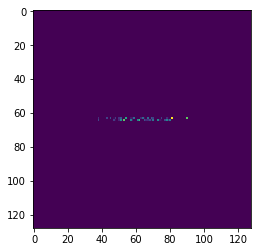

In [5]:
p1 = pro[:,20,:]
#plt.imshow(p1,cmap="gray")
it = 10
f0 = np.ones((1,end),dtype="float64").squeeze(0)
def iter_osem_spect(p,f,i):
    num = str(i)
    c = dic_c[num]
    pj = p/(f.dot(c)+bias)
    temp =c.dot(pj)*(f/np.sum(c+bias,axis=1))
    return temp



for i in tqdm(range(0,it)):
    for j in range(0,59):
        temp = iter_osem_spect(p1[j],f0,j)
        f0 = temp
plt.imshow(f0.reshape(128,128))


In [45]:
p1 = pro[:,1,:]
total_c = np.zeros((128*128,128*60),dtype="float64")
total_p = np.zeros((1,128*60),dtype="float64").squeeze(0)
for i in range(0,59):
    range1 = 128*i
    range2 = 128*(i+1) 
    total_c[:,range1:range2] = dic_c[str(i)]
    total_p[range1:range2] = p1[i]

print(total_p.shape)
a = p1.reshape(128*60,1).squeeze(1)
print(a.shape)

    

(7680,)
(7680,)


In [42]:
pro_splice = pro[:,2,:]
total_c = pro_splice.reshape(128*60,1).squeeze(1)
print(total_c.shape)

(7680,)


In [24]:
iter = 100
f0 = np.ones((1,end),dtype="float32").squeeze(0)
temp = np.ones((1,end),dtype="float32").squeeze(0)
from tqdm import tqdm
for i in tqdm(range(0,iter)):
    temp= total_c.dot(total_p/(f0.dot(total_c+bias)))*(f0/np.sum(total_c+bias,axis=1))
    f0 = temp
plt.imshow(f0.reshape(128,128))
plt.colorbar()

  5%|▌         | 5/100 [00:09<03:04,  1.94s/it]

KeyboardInterrupt: 


100%|██████████| 4/4 [00:11<00:00,  2.89s/it]

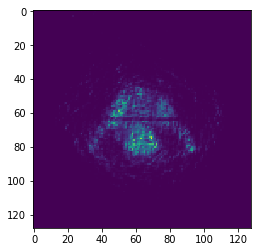

In [41]:
f0 = np.ones((1,end),dtype="float32").squeeze(0)
temp = np.ones((1,end),dtype="float32").squeeze(0)
a1 = 0
a2 = 128*15
a3 = 128*30
a4 = 128*45
a5 = 128*60
iter = 4
for i in tqdm(range(0,iter)):
    temp= total_c[:,a1:a2].dot(total_p[a1:a2]/(f0.dot(total_c[:,a1:a2]+bias)))*(f0/np.sum(total_c[:,a1:a2]+bias,axis=1))
    f0 = temp
    temp= total_c[:,a2:a3].dot(total_p[a2:a3]/(f0.dot(total_c[:,a2:a3]+bias)))*(f0/np.sum(total_c[:,a2:a3]+bias,axis=1))
    f0 = temp
    temp= total_c[:,a3:a4].dot(total_p[a3:a4]/(f0.dot(total_c[:,a3:a4]+bias)))*(f0/np.sum(total_c[:,a3:a4]+bias,axis=1))
    f0 = temp
    temp= total_c[:,a4:a5].dot(total_p[a4:a5]/(f0.dot(total_c[:,a4:a5]+bias)))*(f0/np.sum(total_c[:,a4:a5]+bias,axis=1))
    f0 = temp
plt.imshow(f0.reshape(128,128))

In [48]:
osem_spect = np.zeros((128,128,128),dtype="float32")
def OSEM_SPECT(i,iter):
    pro_splice = pro[:,i,:]
    total_p = pro_splice.reshape(1,128*60).squeeze(0)
    f0 = np.ones((1,end),dtype="float32").squeeze(0)
    temp = np.ones((1,end),dtype="float32").squeeze(0)
    for i in range(0,iter):
        temp= total_c[:,a1:a2].dot(total_p[a1:a2]/(f0.dot(total_c[:,a1:a2]+bias)))*(f0/np.sum(total_c[:,a1:a2]+bias,axis=1))
        f0 = temp
        temp= total_c[:,a2:a3].dot(total_p[a2:a3]/(f0.dot(total_c[:,a2:a3]+bias)))*(f0/np.sum(total_c[:,a2:a3]+bias,axis=1))
        f0 = temp
        temp= total_c[:,a3:a4].dot(total_p[a3:a4]/(f0.dot(total_c[:,a3:a4]+bias)))*(f0/np.sum(total_c[:,a3:a4]+bias,axis=1))
        f0 = temp
        temp= total_c[:,a4:a5].dot(total_p[a4:a5]/(f0.dot(total_c[:,a4:a5]+bias)))*(f0/np.sum(total_c[:,a4:a5]+bias,axis=1))
        f0 = temp
    return f0.reshape(128,128)
for i in tqdm(range(0,128)):
    osem_spect[i] = OSEM_SPECT(i,4)



100%|██████████| 128/128 [20:20<00:00,  9.39s/it]

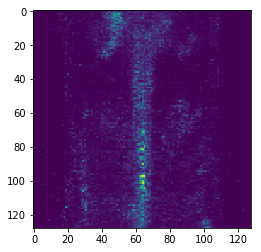

In [59]:
import SimpleITK as sitk
import cv2
plt.imshow(osem_spect[:,64,:])
osem_spect.tofile("osem_mine.raw")

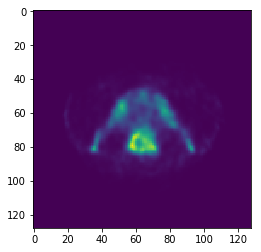

In [22]:
osemData = np.fromfile('OSEM_recon.raw', dtype="float32")
osem = osemData.reshape(128,128,128)
plt.imshow(osem[126,:,:])

In [ ]:
c = dic_c["1"]
print(c[8257,64])
c1 = c[c==0]
#print(c1.shape)
theta = 6
ang = math.pi-theta*math.pi/180
def gg(i):
        a = math.tan(ang)
        print(a)
        b = i/math.cos(theta*math.pi/180+1e-6)
        print(b)
        if a<=0:
            for x in range(-63,65):
                for y in range(-63,65):
                    x2 = x-1
                    y2 = y-1
                    if (x==1) & (y==2):
                        if (a*x+b-y)*(a*x2+b-y2) <=0:
                            print("what")
                        
                    if (a*x+b-y)*(a*x2+b-y2) <=0:
                        pos = (x+63)*128+y+63
                        c = 1
        else:
            for x in range(-63,65):
                for y in range(-63,65):
                    x1 = x-1
                    y1 = y
                    x2 = x
                    y2 = y-2
                    if (a*x1+b-y1)*(a*x2+b-y2) <=0:
                        pos = (x+63)*128+y+63
                        c = 1
        return c
aa = gg(0.5)
print(aa)

In [ ]:
plt.imshow(f0.reshape(128,128))

In [ ]:
import math
plt.imshow(fir)
a = np.linspace(0,1,64)
b = np.linspace(1,0,64)
c = np.concatenate((a,b),axis=0)
res = np.zeros((60,128))
fil = np.zeros((1,255))
fil = fil.squeeze(0)
fil[127] = 0.25
for i in range(128,255):
    if i%2==1:
        fil[i] = -1/(math.pi**2*(i-127)**2)
temp = fil[128:255]
fil[0:127] = temp[::-1]
fil_new = fil
for i in range(0,60):
    p = fir[i]
    val = p
    for j in range(0,128):
        a = 127-j
        b = a+128
        val[j] = np.dot(fil[a:b],p)

    res[i] = val


In [180]:
import math
import multiprocessing 
M=128
fbp = np.zeros((M,M))
def back_projection(pro):
    for i in range(0,60):
        rad = i*6*math.pi/180
        for x in range(1,129):
            for y in range(1,129):
                t_temp = (x-M/2) * math.cos(rad) - (y-M/2) * math.sin(rad)+M/2
                t =   round((t_temp))
                if t>0 & t<M:
                    if t>=128:
                        t=127
                    
                    fbp[x-1,y-1]=fbp[x-1,y-1]+pro[i,t]
    return fbp
    
bp = np.zeros((128,128,128))


In [ ]:
import multiprocessing
import time
p = multiprocessing.Pool(2)
from multiprocessing.dummy import Pool as ThreadPool
def gg(i):
    bp[i] = back_projection(pro[:,i,:])
   
items = [x for x in range(0, 128)]
t1 = time.time()


from tqdm import tqdm
for i in tqdm(range(0,128)):
    bp[i] = back_projection(pro[:,i,:])
t2 = time.time()
print('t2-t1:%4f' % (t2 - t1))

In [ ]:
a = np.zeros((128,128))
for i in range(0,128):
    t = bp[i]
    a[i] = t[100]

plt.imshow(a,cmap=plt.cm.gray_r)



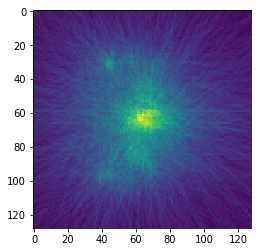

In [181]:
plt.imshow(back_projection(p1))

In [ ]:
from multiprocessing import cpu_count
import multiprocessing
print(cpu_count())
# -*- coding: utf-8 -*-
bp = np.zeros((128,128,128))
t1 = time.time()
def process(item):
    gg(item)

pool = multiprocessing.Pool(4)
pool.map(process, items)
pool.close()
pool.join()
t2 = time.time()
print('t2-t1:%4f' % (t2 - t1))

# PET RECONSTRUCTION BELOW

In [ ]:
PET_TWOPOINT_RAWDATA = np.fromfile('LORData_HotRod39M.raw', dtype="float32")
n = 0
same = []
PET_TWOPOINT_DATA = PET_TWOPOINT_RAWDATA.reshape(-1,7)
len_twopoint = PET_TWOPOINT_DATA.shape[0]
for i in range(len_twopoint):
    temp = PET_TWOPOINT_DATA[i]
    if temp[2] == temp[5]:
        n = n +1 
        same.append(i)

### screen data with the same Z-Axis value to reshape data

In [ ]:
screen_2p_data = PET_TWOPOINT_DATA[same]
sorted_2p = screen_2p_data[screen_2p_data[:,2].argsort()]
p0 = sorted_2p[sorted_2p[:,2]==0]
p0 = p0[p0[:,6]>0]
p0 = p0[p0[:,0].argsort()]
p0 = np.delete(p0, [2,5], axis=1)
s = []
for i in range(p0.shape[0]):
    if abs(abs(p0[i,0]*p0[i,1]/p0[i,2]/p0[i,3])-1)<0.05:
        s.append(i)

print(p0.shape)

In [ ]:
p = PET_TWOPOINT_DATA
dim = -48
dim2 = dim+0.8
aa = p[(p[:,2]>=dim) & (p[:,2]<dim2) & (p[:,5]>=dim) & (p[:,5]<dim2)]
dic = {}
dic.clear()
from tqdm import tqdm
for i in tqdm(range(0,120)):
    dim = -48+0.8*i
    dim2 = dim+0.8
    num = str(i)
    dic[num] = p[(p[:,2]>=dim) & (p[:,2]<dim2) & (p[:,5]>=dim) & (p[:,5]<dim2)]

In [ ]:
p1 = dic["1"]
print(p1[p1[:,0].argsort()])
import math
a = (175/2)**2
for i in tqdm(range(p1.shape[0])):
    a1 = math.sqrt(a/(p1[i,0]**2+p1[i,1]**2))
    a2 = math.sqrt(a/(p1[i,3]**2+p1[i,4]**2))
    m1 = [0,1]
    m2 = [3,4]
    p1[i,0] = p1[i,0]*a1
    p1[i,1] = p1[i,1]*a1
    p1[i,3] = p1[i,3]*a2
    p1[i,4] = p1[i,4]*a2



In [ ]:
l=17
a = p[(p[:,0]<=l) & (p[:,0]>=l-1) & (p[:,3]<=l) & (p[:,3]>=l-1)]
print(a)

In [ ]:
p = dic["61"]
x = p1[:,3]
y = p1[:,4]
plt.figure(figsize=(5,5))
plt.plot(x,y,"p")
a = p1[(p1[:,0]==87.5) | (p1[:,3]==87.5)]
print(a)
l=3
a = p[(p[:,0]<=l) & (p[:,0]>=l-0.5) & (p[:,3]<=l) & (p[:,3]>=l-0.5)]
print(a)


In [ ]:
def get_pos(x1,y1,x2,y2,ang):
    R=60
    an = ang-math.pi/2
    px = R*math.cos(an)
    py = R*math.sin(an)
    A = (y1-y2)/(x1-x2)
    B = -1
    C = y1-A*x1
    d = R-abs((A*px+B*py+C)/math.sqrt(A**2+B**2))
    pos = math.floor(d*2)+100
    if pos <200:
        return pos
    else:
        return 0


p1 = dic["61"]
p1 = p1[p1[:,6]>0]
one = math.pi/180
pro = np.zeros((180,200))
theta = 0
for n in tqdm(range(0,180)):
    for j in range(p1.shape[0]):
        x1 = p1[j,0]
        y1 = p1[j,1]
        x2 = p1[j,3]
        y2 = p1[j,4]

        k = (y1-y2)/(x1-x2)
        th = theta*math.pi/180+1e-6
        if (k>=math.tan(th)) & (k<math.tan(th+one)):
            pro[theta,get_pos(x1,y1,x2,y2,th)] = p1[j,6]
    theta = theta + 1
        

In [ ]:
a = p1[2]
x1 = a[0]
y1 = a[1]
x2 = a[3]
y2 = a[4]
k = (y1-y2)/(x1-x2)
print(k)
print(math.tan(162*math.pi/180))
mm = 162*math.pi/180+1e-6
print(get_pos(x1,y1,x2,y2,mm))
for i in range(0,180):
    th = i*math.pi/180+1e-6
    if (k>=math.tan(th)) & (k<math.tan(th+one)):
         print(i)
print(pro[162,95])
print(a[6])

In [ ]:
M=140
fbp = np.zeros((140,140))
def pet_bp(pro):
    for i in range(0,180):
        rad = i*math.pi/180
        for x in range(1,141):
            for y in range(1,141):
                t_temp = (x-M/2) * math.cos(rad) - (y-M/2) * math.sin(rad)+M/2
                t =   round((t_temp))
                if t>0 & t<M:
                    if t>=140:
                        t=139
                    
                    fbp[x-1,y-1]=fbp[x-1,y-1]+pro[i,t]
    return fbp
plt.imshow(pet_bp(pro),cmap="gray")

### OSEM FOR PET

In [ ]:
#set transform metrix
image_size = 140*140
image_wid = 140
num_det = 200
c1 = np.zeros((image_size,num_det),dtype=np.float64)
c2 = np.zeros((image_size,num_det),dtype=np.float64)
c3 = np.zeros((image_size,num_det),dtype=np.float64)
c4 = np.zeros((image_size,num_det),dtype=np.float64)
ct1 = c1.T
ct3 = c3.T
s2 = math.sqrt(2)
for i in range(0,image_wid):
    a = np.linspace(1,140,140,dtype="int")*140+i-140
    ct1[i+29,a] = 1
    c1 = ct1.T 
for x in range(0,image_wid):
    for y in range(0,image_wid):
        for k in range(0,num_det):
            x1 = -35+0.5*y
            y1 = 35-0.5*x
            x2 = x1 + 0.5
            y2 = y1 - 0.5
            b = 0.5*(100-k)*s2-0.25*s2
            if (x1+b-y1)*(x2+b-y2)<=0:
                c2[x*140+y,k] = 1
for i in range(0,image_wid):
    a = np.linspace(0,139,140,dtype="int")+i*140
    ct3[i+29,a] = 1
    c3 = ct3.T 

for x in range(0,image_wid):
    for y in range(0,image_wid):
        for k in range(0,num_det):
            x1 = -35+0.5*y+0.5
            y1 = 35-0.5*x
            x2 = x1 - 0.5
            y2 = y1 - 0.5
            b = 0.5*(100-k)*s2-0.25*s2
            if (-x1+b-y1)*(-x2+b-y2)<=0:
                c4[x*140+y,k] = 1


In [ ]:
print(c4[c4>0])

In [ ]:
iter = 10
p = dic["59"]
p1 = np.zeros((1,200)).squeeze(0)
p2 = np.zeros((1,200)).squeeze(0)
p3 = np.zeros((1,200)).squeeze(0)
p4 = np.zeros((1,200)).squeeze(0)
p = p[p[:,6]>=0]
#a = p[(p[:,0]<l) & (p[:,0]>=l-0.5) & (p[:,3]2<l) & (p[:,3]>=l-0.5)]
#b = np.sum(a,axis=0)[6]
# rotate matrix
# rot45 = np.array([[s2/2,-s2/2],[s2/2,s2/2]])
# rot90 = np.array([[0,-1],[1,0]])
# rot135 = np.array([[-s2/2,-s2/2],[s2/2,-s2/2]])
rot45 = np.array([[s2/2,s2/2],[-s2/2,s2/2]])
rot90 = np.array([[0,1],[-1,0]])
rot135 = np.array([[-s2/2,-s2/2],[s2/2,-s2/2]])
rot45_p = p
rot90_p = p
rot135_p = p
# rot45_p = np.zeros((p.shape[0],p.shape[1]))
# rot90_p = np.zeros((p.shape[0],p.shape[1]))
# rot135_p = np.zeros((p.shape[0],p.shape[1]))
rot45_p[:,[0,1]] = np.dot(p[:,[0,1]],rot45)
rot45_p[:,[3,4]] = np.dot(p[:,[3,4]],rot45)
rot90_p[:,[0,1]] = np.dot(p[:,[0,1]],rot90)
rot90_p[:,[3,4]] = np.dot(p[:,[3,4]],rot90)
rot135_p[:,[0,1]] = np.dot(p[:,[0,1]],rot135)
rot135_p[:,[3,4]] = np.dot(p[:,[3,4]],rot135)
b = np.array([1,-1])
for i in range(0,200):
    l = 0.5*i-49.5
    a = p[(p[:,0]<=l) & (p[:,0]>=l-0.5) & (p[:,3]<=l) & (p[:,3]>=l-0.5)]
    b = rot45_p[(rot45_p[:,0]<l) & (rot45_p[:,0]>=l-0.5) & (rot45_p[:,3]<l) & (rot45_p[:,3]>=l-0.5)]
    c = rot90_p[(rot90_p[:,0]<l) & (rot90_p[:,0]>=l-0.5) & (rot90_p[:,3]<l) & (rot90_p[:,3]>=l-0.5)]
    d = rot135_p[(rot135_p[:,0]<l) & (rot135_p[:,0]>=l-0.5) & (rot135_p[:,3]<l) & (rot135_p[:,3]>=l-0.5)]

    p1[i] = np.sum(a,axis=0)[6]
    p2[i] = np.sum(b,axis=0)[6]
    p3[i] = np.sum(c,axis=0)[6]
    p4[i] = np.sum(d,axis=0)[6]


# aa = p[:,[0,1]][0:5]
# print(np.dot(p[0,[0,1]],rot45))
# # print(aa)
# # print(np.dot(np.array([66,-57]),rot45))
# print(p)
# print(rot45_p)



In [ ]:
l=0
a = p[(p[:,0]<=l) & (p[:,0]>=l-0.5) & (p[:,3]<=l) & (p[:,3]>=l-0.5)]
print(a)


In [ ]:
print(f0[f0>0])

In [ ]:
f0 = np.ones((1,image_size),dtype=np.float64).squeeze(0)
bias = 1e-9
it  = 100
temp = np.array([])
pj = p1/(f0.dot(c1)+bias)
temp = c1.dot(pj)*(f0/np.sum(c1+bias,axis=1))
for k in range(0,it):
    pj = p1/(f0.dot(c1)+bias)
    #print(pj)
    temp = c1.dot(pj)*(f0/np.sum(c1+bias,axis=1))
    # print(c1.dot(pj))
    # print(f0/np.sum(c1+bias,axis=1))
    #print(temp[temp>0])
    f0 = temp
    pj = p2/(f0.dot(c2)+1)
    #print(p2[p2>0])
    temp = c2.dot(pj)*(temp/np.sum(c2+bias,axis=1))
    #print(temp[temp>0])
    f0 = temp
    pj = p3/(f0.dot(c3)+1)
    #print(pj)
    temp = c3.dot(pj)*(temp/np.sum(c3+bias,axis=1))
    #print(temp[temp>0])
    f0 = temp
    pj = p4/(f0.dot(c1)+1)
    #print(p4[p4>0])
    temp = c4.dot(pj)*(f0/np.sum(c4+bias,axis=1))
    #print(c4[c4>0])
    #print(temp[temp>0])
    f0 = temp
plt.imshow(f0.reshape(140,140),cmap="gray")

In [ ]:
pj = p1/(f0.dot(c1)+bias)
temp = f0
a = c1.dot(pj)

c = temp/np.sum(c1+bias,axis=1)
d = a*c
temp = c1.dot(pj)*(f0/np.sum(c1+bias,axis=1))
print(temp[temp>0])


In [ ]:
l = 
b = rot45_p[(rot45_p[:,0]<l) & (rot45_p[:,0]>=l-0.5) & (rot45_p[:,3]<l) & (rot45_p[:,3]>=l-0.5)]
print(b)